### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [271]:
import numpy as np
import pandas as pd
vehicle=pd.read_csv("vehicle.csv")
vehicle.dropna(inplace=True)

In [272]:
vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [273]:
print(vehicle["class"].value_counts())

car    413
bus    205
van    195
Name: class, dtype: int64


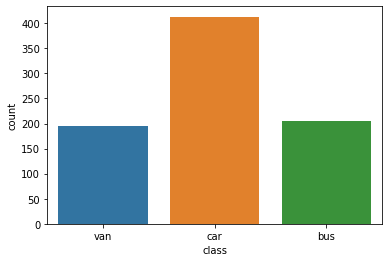

In [274]:
import seaborn as sns
sns.countplot(data=vehicle,x='class')

### Check for any missing values in the data 

In [275]:
vehicle.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [276]:
vehicle.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [277]:
vehicle_df=vehicle.drop("class",axis=1)
vehicle_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195


In [278]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
vehicle_df=scale.fit_transform(vehicle_df)
vehicle_df

array([[ 0.16323063,  0.52040788,  0.06066872, ...,  0.37128716,
        -0.3218087 ,  0.17183708],
       [-0.32287376, -0.61912319,  0.12406675, ...,  0.14710858,
         0.00340009,  0.44231829],
       [ 1.2569655 ,  0.84598818,  1.51882349, ..., -0.41333788,
        -0.1592043 ,  0.03659647],
       ...,
       [ 1.5000177 ,  1.49714879,  1.20183332, ..., -0.97378433,
        -0.3218087 ,  0.7127995 ],
       [-0.93050425, -1.43307395, -0.25632145, ...,  1.38009078,
         0.16600449, -0.09864413],
       [-1.05203035, -1.43307395, -1.01709784, ...,  0.59546574,
        -0.4844131 , -0.77484716]])

StandardScaler(copy=True, with_mean=True, with_std=True)

### K - Means Clustering

### Assign a dummy array called Cluster_error

In [292]:
Cluster_error=[]
type(Cluster_error)

list

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [293]:
iterate=np.arange(1,11)
iterate

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [294]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
for k in iterate:
    model=KMeans(n_clusters=k)
    model.fit(vehicle_df)
    print((sum(np.min(cdist(vehicle_df, model.cluster_centers_, 'euclidean'), axis=1)) / vehicle_df.shape[0]))
    prediction=model.predict(vehicle_df)
    Cluster_error.append(sum(np.min(cdist(vehicle_df, model.cluster_centers_, 'euclidean'), axis=1)) / vehicle_df.shape[0])

3.939299196727955
2.966824380205441
2.6428664657321073
2.548617081764424
2.4285148227827458
2.315019488970958
2.2421006157090035
2.1924887890428737
2.1033220246379893
2.037599934291557


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

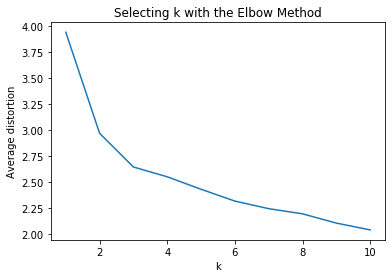

In [295]:
plt.plot(iterate, Cluster_error)
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

### Find out the optimal value of K

Clearly,The elbow is sharp at k=3 or when the number of clusters is 3. Beyond k=3, the drop in error is very minimal.

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [296]:
final_model=KMeans(3)
final_model.fit(vehicle_df)
prediction=final_model.predict(vehicle_df)
prediction

array([1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 2,
       1, 0, 2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0,
       0, 1, 0, 1, 2, 1, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 1, 2, 2,
       1, 0, 1, 2, 1, 0, 0, 2, 1, 0, 1, 2, 1, 0, 1, 0, 2, 1, 2, 1, 0, 2,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 2,
       0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 0, 2, 1, 1, 2, 2,
       1, 2, 0, 0, 2, 2, 1, 2, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1,
       2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 2, 1, 0, 1,
       2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1, 2, 1, 1, 2, 2, 0,
       1, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 2, 1, 1, 0, 0, 2, 0,
       1, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0, 1, 2, 2, 2,
       2, 0, 1, 2, 0, 0, 0, 1, 0, 2, 2, 0, 2, 1, 0,

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [297]:
final_model.cluster_centers_

array([[-0.91400071, -0.51327609, -0.88664922, -1.05602904, -0.49182906,
        -0.21883169, -0.775563  ,  0.85996991, -0.74203582, -0.47827281,
        -0.77910348, -0.78034412, -0.37943428,  0.82611912, -0.08658373,
        -0.30355495, -1.04650237, -1.10265258],
       [-0.2319252 , -0.57973847, -0.30724438, -0.02693437,  0.20516443,
        -0.11572895, -0.45873352,  0.32447256, -0.48810058, -0.54152679,
        -0.41282893, -0.46297248, -0.60799507, -0.62342017, -0.06824398,
         0.01513248,  0.82481456,  0.71018194],
       [ 1.13076532,  1.17094237,  1.19500584,  1.01909505,  0.21505188,
         0.34250798,  1.27180461, -1.19061224,  1.27548416,  1.09266768,
         1.22038121,  1.28132727,  1.07954232, -0.02879497,  0.16229031,
         0.26566456, -0.00535553,  0.18380067]])

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [298]:
vehicle_centroid=pd.DataFrame(final_model.cluster_centers_,columns=vehicle.drop("class",axis=1).columns)
vehicle_centroid

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.914001,-0.513276,-0.886649,-1.056029,-0.491829,-0.218832,-0.775563,0.859970,-0.742036,-0.478273,-0.779103,-0.780344,-0.379434,0.826119,-0.086584,-0.303555,-1.046502,-1.102653
1,-0.231925,-0.579738,-0.307244,-0.026934,0.205164,-0.115729,-0.458734,0.324473,-0.488101,-0.541527,-0.412829,-0.462972,-0.607995,-0.623420,-0.068244,0.015132,0.824815,0.710182
2,1.130765,1.170942,1.195006,1.019095,0.215052,0.342508,1.271805,-1.190612,1.275484,1.092668,1.220381,1.281327,1.079542,-0.028795,0.162290,0.265665,-0.005356,0.183801


Hint: Use pd.Dataframe function 

In [299]:
vehicle

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


### Use kmeans.labels_ function to print out the labels of the classes

In [300]:
final_model.labels_

array([1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 2,
       1, 0, 2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0,
       0, 1, 0, 1, 2, 1, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 1, 2, 2,
       1, 0, 1, 2, 1, 0, 0, 2, 1, 0, 1, 2, 1, 0, 1, 0, 2, 1, 2, 1, 0, 2,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 2,
       0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 0, 2, 1, 1, 2, 2,
       1, 2, 0, 0, 2, 2, 1, 2, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1,
       2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 2, 1, 0, 1,
       2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1, 2, 1, 1, 2, 2, 0,
       1, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 2, 1, 1, 0, 0, 2, 0,
       1, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0, 1, 2, 2, 2,
       2, 0, 1, 2, 0, 0, 0, 1, 0, 2, 2, 0, 2, 1, 0,

In [301]:
vehicle["Cluster Class"]=prediction
vehicle[["class","Cluster Class"]]

,class,Cluster Class
0,van,1
1,van,1
2,car,2
3,van,1
4,bus,0
...,...,...
841,car,1
842,van,1
843,car,2
844,car,1


## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [224]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [269]:
X = np.concatenate((a, b,c))
df=pd.DataFrame(X)

In [270]:
df

,0,1
0,13.882785,4.438501
1,11.687256,1.250981
2,10.316397,1.449346
3,9.837412,-2.041974
4,8.691601,-4.289773
...,...,...
245,9.248848,24.346291
246,6.958291,16.448655
247,11.260042,20.333577
248,6.889835,21.238297


### 10. Use scatter matrix to print all the 3 distributions

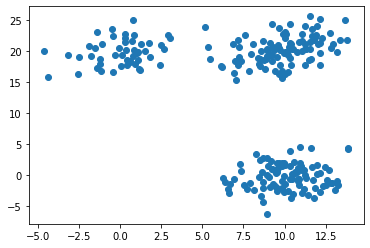

In [268]:
plt.scatter(X[:,0], X[:,1])
plt.show()

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [267]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, method='ward',metric='euclidean')
Z

array([[6.00000000e+00, 3.50000000e+01, 4.03105214e-02, 2.00000000e+00],
       [1.59000000e+02, 2.47000000e+02, 4.15336058e-02, 2.00000000e+00],
       [1.90000000e+02, 2.14000000e+02, 4.23431904e-02, 2.00000000e+00],
       [1.50000000e+01, 5.50000000e+01, 5.03965285e-02, 2.00000000e+00],
       [2.30000000e+01, 9.70000000e+01, 5.98615830e-02, 2.00000000e+00],
       [1.83000000e+02, 2.30000000e+02, 7.14307127e-02, 2.00000000e+00],
       [1.60000000e+02, 1.84000000e+02, 8.10640748e-02, 2.00000000e+00],
       [5.20000000e+01, 9.80000000e+01, 8.63310058e-02, 2.00000000e+00],
       [1.75000000e+02, 2.33000000e+02, 9.07935743e-02, 2.00000000e+00],
       [8.00000000e+00, 1.90000000e+01, 1.05398862e-01, 2.00000000e+00],
       [6.60000000e+01, 7.30000000e+01, 1.08977001e-01, 2.00000000e+00],
       [5.90000000e+01, 9.60000000e+01, 1.15828291e-01, 2.00000000e+00],
       [9.20000000e+01, 2.53000000e+02, 1.34937651e-01, 3.00000000e+00],
       [2.10000000e+02, 2.31000000e+02, 1.37055098e

### 12. Plot the dendrogram for the consolidated dataframe

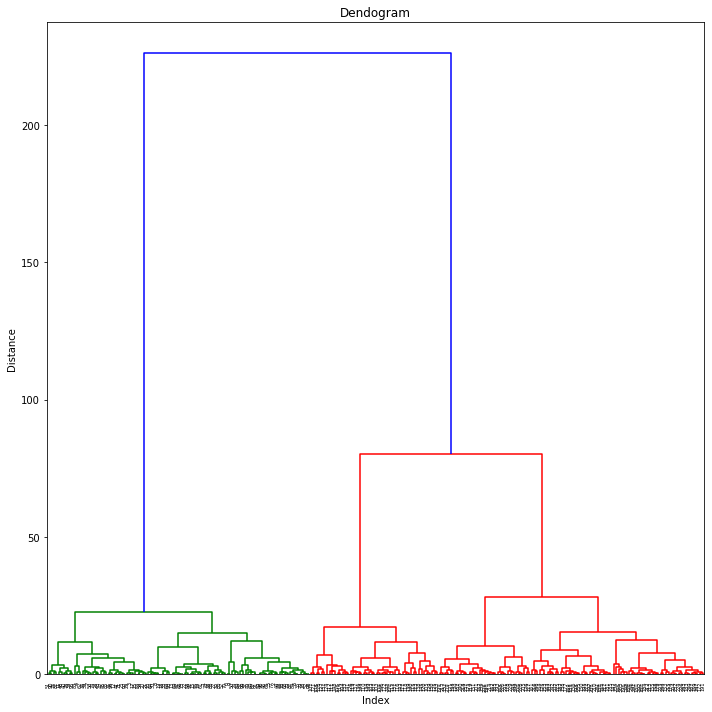

In [266]:
plt.figure(figsize=(10, 10))
plt.title('Dendogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90)
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

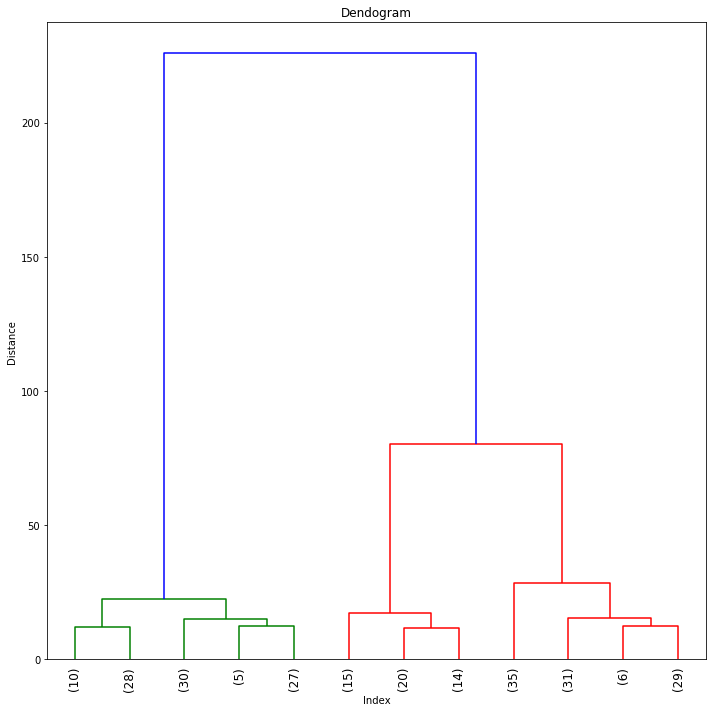

In [265]:
plt.figure(figsize=(10, 10))
plt.title('Dendogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90,truncate_mode='lastp',p=12)
plt.tight_layout()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

The optimal Distance between clusters is around 50. Let us take the optimal distance as 50

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [260]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, t=50, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

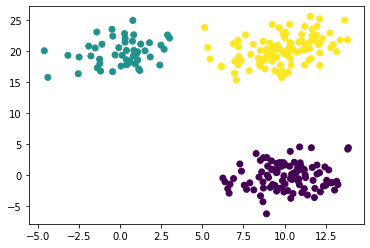

In [264]:
plt.scatter(X[:,0], X[:,1], c=clusters) 
plt.show()